# Fraud detection

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import seaborn as sns

## Step2- Retrieve the Data

In [2]:
credit_card = pd.read_csv('creditcard.csv')

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step3- Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!



In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

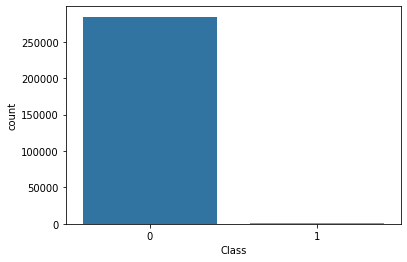

In [5]:
sns.countplot(x='Class', data=credit_card)

## Step4- Preparing the data into train and test 

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [6]:
X = credit_card.drop(columns='Class', axis=1) 
y = credit_card.Class.values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 5- Build a Logistic Regression model for classification

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'newton-cg')

## Step 6- Train the model

In [23]:
lr.fit(X_train, y_train)

C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(solver='newton-cg')

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[-3.18480748e-05  1.70217941e-01 -1.26052956e-01 -4.48847653e-01
   3.97022317e-01  2.06584205e-01 -1.15389299e-01  9.86001610e-02
  -2.65958106e-01 -3.26697500e-01 -2.89244058e-01 -3.48066910e-01
   5.08301887e-02 -2.98490273e-01 -7.09747889e-01 -4.06506355e-01
  -2.23080883e-01 -2.27295861e-01  1.16213128e-01  4.16053212e-02
  -1.55485983e-01  4.20404992e-01  7.11286269e-01 -5.75296463e-02
   2.39977085e-02 -5.97263087e-01  2.38273074e-01 -3.64973897e-01
  -8.76014451e-02 -3.50150957e-04]]
[-5.1353324]


## Step7- Evaluation

In [25]:
y_predict = lr.predict(X_test)

In [26]:
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score 
test_accuracy = accuracy_score(y_test, y_predict)*100
print('Testing accuracy: ', test_accuracy) 

Testing accuracy:  99.92445763775841


In [28]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict))

Confusion matrix:
 [[93825    13]
 [   58    91]]


In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print(tn,fp,fn,tp)

93825 13 58 91


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, digits=6))

              precision    recall  f1-score   support

           0   0.999382  0.999861  0.999622     93838
           1   0.875000  0.610738  0.719368       149

    accuracy                       0.999245     93987
   macro avg   0.937191  0.805300  0.859495     93987
weighted avg   0.999185  0.999245  0.999177     93987



C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


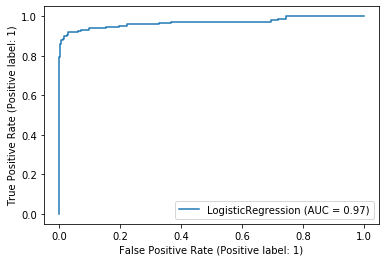

In [31]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(lr, X_test, y_test)
plt.show()

In [32]:
y_test_predict_probs = lr.predict_proba(X_test)[:,1]

In [33]:
y_test_predict_probs

array([9.99998408e-01, 4.27245262e-04, 5.70747650e-04, ...,
       3.07835832e-04, 1.55625467e-04, 1.96164035e-04])

In [34]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_probs) 

In [35]:
from numpy import argmax
best = tpr - fpr

ix = argmax(best)
best_threshold = thresholds[ix]
print('Best Threshold = ', best_threshold)

Best Threshold =  0.003893087419899236
